# Лабораторна робота №2. Методи класифікації.

### Виконала студентка групи КМ-01мн Григоренко Анастасія 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MN-03-Hryhorenko1.csv', sep = ';',
                names=['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7','y'],
                index_col=None)

In [4]:
df.loc[(df['x_1'] == 'M'),'x_1']= 1
df.loc[(df['x_1'] == 'F'),'x_1']= 0

df.loc[(df['x_2'] == 'yes'),'x_2']= 1
df.loc[(df['x_2'] == 'no'),'x_2']= 0

df.loc[(df['x_3'] == 'yes'),'x_3']= 1
df.loc[(df['x_3'] == 'no'),'x_3']= 0

df.loc[(df['x_4'] == 'yes'),'x_4']= 1
df.loc[(df['x_4'] == 'no'),'x_4']= 0

In [5]:
split = np.random.rand(65) < 0.82
train = df[split]
test = df[~split]

Алгоритм пошуку відсікань базується на мінімізації суми дисперсій залежних змінних по обидві сторони від порогу:

In [6]:
def spliter(df, sample_size):
    features_names = df.columns[:-1]
    features = df.to_numpy()[:, :-1].T
    splits = {}
    for feature, feature_name in zip(features, features_names):
        unique_values = np.sort(np.unique(feature))
        try:
            gap = min(unique_values[1:] - unique_values[:-1])/2
        except:
            continue
        boards = unique_values - gap
        boards = boards[1:]
        for board in boards:
            split_more = df[df[feature_name] > board]
            split_less = df[df[feature_name] < board]
            if min([len(split_more)/sample_size, len(split_less)/sample_size]) < 0.1:
                continue
            s1 = np.nan_to_num(np.var(split_more['y']))
            s2 = np.nan_to_num(np.var(split_less['y']))
            s = s1 + s2
            splits[s] = (feature_name, board)
    return splits[min(splits.keys())]

In [7]:
sample_size = len(train)
predicted_values = []
for i in range(len(test)):
    splited_train_df = train.copy()
    while True:
        try:
            feature, board = spliter(splited_train_df, sample_size)
        except:
            predicted_values.append(splited_train_df['y'].mean())
            break

        if float(test.iloc[[i]][feature]) < board:
            splited_train_df = splited_train_df[splited_train_df[feature] < board]
        elif float(test.iloc[[i]][feature]) > board:
            splited_train_df = splited_train_df[splited_train_df[feature] > board]

In [8]:
test['y_prediction'] = predicted_values
test

C:\Users\Nastya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x_1,x_2,x_3,x_4,x_5,x_6,x_7,y,y_prediction
2,0,1,0,1,4,2,5,10,10.000000
10,1,0,1,1,4,3,5,11,12.875000
12,0,0,0,1,5,3,3,13,12.100000
13,1,1,1,1,4,1,3,10,11.500000
20,0,0,0,1,4,3,5,12,12.100000
26,0,0,1,1,4,3,1,13,13.833333
29,1,0,1,1,4,1,4,12,13.714286
33,0,0,1,1,5,2,1,13,13.833333
36,1,0,1,1,4,1,4,16,13.714286
39,1,0,1,1,5,1,1,16,13.833333


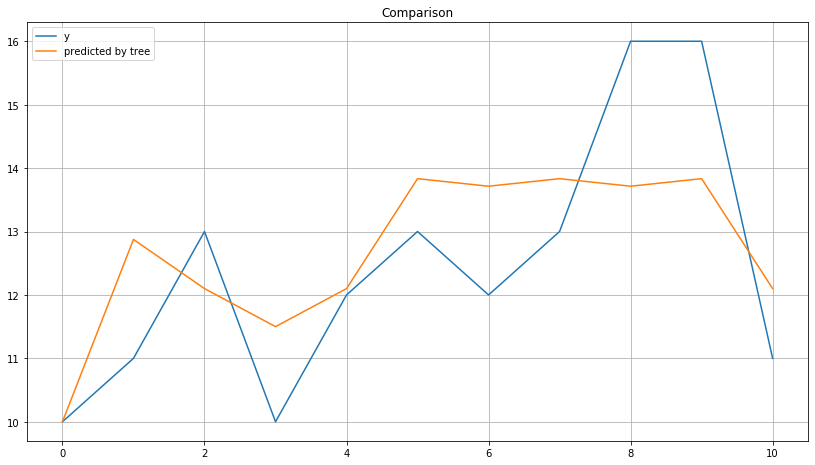

In [9]:
fig, ax = plt.subplots()
ax.plot(range(len(test)), test['y'], label='y')
ax.plot(range(len(test)), test['y_prediction'], label='predicted by tree')
fig.set_size_inches(14, 7.7)
plt.legend()
ax.grid()
ax.set_title('Comparison')
plt.show()

Метод k-найближчих сусідів:

In [10]:
def knn_regressor(train_data, obj_to_pred, target= 'y', k=2):
    distances = {}
    x = train_data.drop(columns = [target])
    for row in range(len(train_data)):
        distances[((x.iloc[row] - obj_to_pred)**2).sum()] = train_data[target].iloc[row]
    
    y = [distances[i] for i in sorted(distances.keys(), reverse=True)[:k]]

    return sum(y)/len(y)

Тестування методу при k, що змінюється від k=2 до k=10:

In [11]:
for kn in range(2, 11):
    knn = []
    for row in range(len(test)):
        knn.append(knn_regressor(train, test.iloc[row, :7], k = kn))
    test[str(kn)+'nn'] = knn.copy()

C:\Users\Nastya\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
test

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,y,y_prediction,2nn,3nn,4nn,5nn,6nn,7nn,8nn,9nn,10nn
2,0,1,0,1,4,2,5,10,10.000000,11.5,11.333333,12.00,12.2,12.500000,12.857143,12.250,12.111111,11.9
10,1,0,1,1,4,3,5,11,12.875000,11.0,12.000000,11.75,12.2,12.333333,12.714286,12.625,12.333333,12.2
12,0,0,0,1,5,3,3,13,12.100000,11.5,11.000000,11.00,11.8,12.000000,12.285714,12.125,11.777778,12.0
13,1,1,1,1,4,1,3,10,11.500000,11.5,11.000000,12.00,11.2,11.166667,11.428571,11.375,11.777778,12.0
20,0,0,0,1,4,3,5,12,12.100000,11.0,12.000000,12.25,12.6,13.166667,12.857143,12.500,12.444444,12.3
26,0,0,1,1,4,3,1,13,13.833333,10.5,10.000000,11.00,11.4,11.333333,11.571429,11.375,11.777778,12.0
29,1,0,1,1,4,1,4,12,13.714286,11.5,11.000000,12.00,12.6,12.333333,12.571429,12.625,12.666667,12.5
33,0,0,1,1,5,2,1,13,13.833333,11.0,11.000000,11.50,12.2,11.833333,11.714286,11.750,11.444444,11.4
36,1,0,1,1,4,1,4,16,13.714286,11.5,11.000000,12.00,12.6,12.333333,12.571429,12.625,12.666667,12.5
39,1,0,1,1,5,1,1,16,13.833333,11.0,11.000000,12.00,11.8,11.166667,11.142857,11.000,11.111111,10.9


In [13]:
sv = {}
for regr in test.columns[8:]:
    sv[regr] = ((test[regr] - test['y'])**2).mean()

Порівняння точності отриманих результатів при застосуванні дерева прийняття рішень, а також при застосуванні методу k-найближчих сусідів з різними варіантами параметру k:

In [67]:
sv

{'y_prediction': 2.8250935491276405,
 '2nn': 8.166666666666666,
 '3nn': 6.9753086419753085,
 '4nn': 5.375,
 '5nn': 4.822222222222223,
 '6nn': 5.462962962962963,
 '7nn': 4.759637188208617,
 '8nn': 4.463541666666667,
 '9nn': 4.226337448559671,
 '10nn': 4.372222222222224}